

### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.







# **Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install selenium

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time

from selenium import webdriver
from selenium.webdriver.common.by import By

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
movie_links = soup.find_all('a', class_='title-list-grid__item--link')
movie_urls = [link['href'] for link in movie_links]
base_url = 'https://www.justwatch.com'
movie_urls = [base_url + link['href'] for link in movie_links]
movie_urls

['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/anatomie-dune-chute',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/fighter-2022',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/amar-singh-chamkila',
 'https://www.justwatch.com/in/movie/12th-fail',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/bramayugam',
 'https://www.justwatch.com/in/movie/poor-things',
 'https://www.justwa

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
import time
movie_titles = []
for url in movie_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    h1_tag = soup.find('h1')
    title = h1_tag.text.strip() if h1_tag else 'Title not found'
    movie_titles.append(title)

## **Scrapping release Year**

In [ ]:
# Write Your Code here
import time
release_year = []
for url in movie_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    year_span = soup.find('span', class_='text-muted')
    year = year_span.text.strip() if year_span else 'Year not found'
    release_year.append(year)

## **Scrapping Genres**

In [ ]:
# Write Your Code here
genres_list = []
for url in movie_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Genres')
        if heading_tag:
            genre_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if genre_tag:
                genre = genre_tag.text.strip()
                genres_list.append(genre)
            else:
                genres_list.append('NA')
        else:
            genres_list.append('NA')
    else:
        genres_list.append('NA')

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
imdb_ratings = []
for url in movie_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Rating')
        if heading_tag:
            imdb_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if imdb_tag:
                imdb = imdb_tag.text.strip()
                imdb_ratings.append(imdb)
            else:
                imdb_ratings.append('NA')
        else:
            imdb_ratings.append('NA')
    else:
        imdb_ratings.append('NA')

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
runtime = []
for url in movie_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
        if heading_tag:
            runtime_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if runtime_tag:
                runtimes = runtime_tag.text.strip()
                runtime.append(runtimes)
            else:
                runtime.append('NA')
        else:
            runtime.append('NA')
    else:
        runtime.append('NA')

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
age_ratings = []
for url in movie_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
        if heading_tag:
            age_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if runtime_tag:
                age_rating = age_tag.text.strip()
                age_ratings.append(age_rating)
            else:
                age_ratings.append('NA')
        else:
            age_ratings.append('NA')
    else:
        age_ratings.append('NA')

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
prod_countries = []
for url in movie_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
        if heading_tag:
            prod_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if runtime_tag:
                prod_country = prod_tag.text.strip()
                prod_countries.append(prod_country)
            else:
                prod_countries.append('NA')
        else:
            prod_countries.append('NA')
    else:
        prod_countries.append('NA')

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
streaming_services = []
streaming_service_keywords = ['primevideo', 'netflix', 'jiocinema', 'hotstar', 'sonyliv', 'voot', 'zee5', 'apple tv+']

for url in movie_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        buybox_divs = soup.find_all('div', class_='buybox-row__offers')
        services_found = set()
        for buybox_div in buybox_divs:
            offer_link = buybox_div.find('a')['href']
            for keyword in streaming_service_keywords:
                if re.search(keyword, offer_link, re.IGNORECASE):
                    services_found.add(keyword)
                    break
        if services_found:
            streaming_services.append(list(services_found))
        else:
            streaming_services.append(["NA"])
    else:
        streaming_services.append(["NA"])

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
data = {"movie_urls": movie_urls, "movie_titles": movie_titles,"release_year":release_year,"genres":genres_list,"imdb_ratings":imdb_ratings,
       "runtime":runtime,"age_ratings":age_ratings,"prod_countries":prod_countries,"streaming_services":streaming_services}
movies = pd.DataFrame(data)
movies

,movie_urls,movie_titles,release_year,genres,imdb_ratings,runtime,age_ratings,prod_countries,streaming_services
0,https://www.justwatch.com/in/movie/untitled-sh...,Teri Baaton Mein Aisa Uljha Jiya,(2024),"Comedy, Drama, Romance, Science-Fiction",6.4 (47k),2h 21min,NA,India,[primevideo]
1,https://www.justwatch.com/in/movie/premalu,Premalu,Year not found,"Comedy, Romance",8.0 (7k),2h 36min,U,India,[NA]
2,https://www.justwatch.com/in/movie/hanu-man,Hanu-Man,Year not found,"Science-Fiction, Fantasy, Action & Adventure, ...",7.9 (22k),NA,NA,NA,[NA]
3,https://www.justwatch.com/in/movie/oppenheimer,Oppenheimer,Year not found,"Drama, History",NA,NA,NA,NA,[NA]
4,https://www.justwatch.com/in/movie/anatomie-du...,Anatomy of a Fall,Year not found,"Mystery & Thriller, Drama, Crime",NA,NA,NA,NA,[NA]
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/barbie-2023,Title not found,Year not found,NA,NA,NA,NA,NA,[NA]
96,https://www.justwatch.com/in/movie/case-of-kon...,Title not found,Year not found,NA,NA,NA,NA,NA,[NA]
97,https://www.justwatch.com/in/movie/joshua-imai...,Title not found,Year not found,NA,NA,NA,NA,NA,[NA]
98,https://www.justwatch.com/in/movie/2012,Title not found,Year not found,"Action & Adventure, Science-Fiction",NA,NA,NA,NA,[NA]


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_links = soup.find_all('a', class_='title-list-grid__item--link')
tv_urls = [link['href'] for link in tv_links]
base_url = 'https://www.justwatch.com'
tv_urls = [base_url + link['href'] for link in tv_links]
tv_urls

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
tv_titles = []
for url in tv_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    h1_tag = soup.find('h1')
    title = h1_tag.text.strip() if h1_tag else 'Title not found'
    tv_titles.append(title)

## **Fetching Release Year**

In [ ]:
# Write Your Code here
release_year = []
for url in tv_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    year_span = soup.find('span', class_='text-muted')
    year = year_span.text.strip() if year_span else 'Year not found'
    release_year.append(year)

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
genres_list = []
for url in tv_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Genres')
        if heading_tag:
            genre_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if genre_tag:
                genre = genre_tag.text.strip()
                genres_list.append(genre)
            else:
                genres_list.append('NA')
        else:
            genres_list.append('NA')
    else:
        genres_list.append('NA')

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
imdb_ratings = []
for url in tv_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Rating')
        if heading_tag:
            imdb_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if imdb_tag:
                imdb = imdb_tag.text.strip()
                imdb_ratings.append(imdb)
            else:
                imdb_ratings.append('NA')
        else:
            imdb_ratings.append('NA')
    else:
        imdb_ratings.append('NA')

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
age_ratings = []
for url in tv_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
        if heading_tag:
            age_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if runtime_tag:
                age_rating = age_tag.text.strip()
                age_ratings.append(age_rating)
            else:
                age_ratings.append('NA')
        else:
            age_ratings.append('NA')
    else:
        age_ratings.append('NA')

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
prod_countries = []
for url in tv_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
        if heading_tag:
            prod_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if runtime_tag:
                prod_country = prod_tag.text.strip()
                prod_countries.append(prod_country)
            else:
                prod_countries.append('NA')
        else:
            prod_countries.append('NA')
    else:
        prod_countries.append('NA')

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
streaming_services = []
streaming_service_keywords = ['primevideo', 'netflix', 'jiocinema', 'hotstar', 'sonyliv', 'voot', 'zee5', 'apple tv+']

for url in tv_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        buybox_divs = soup.find_all('div', class_='buybox-row__offers')
        services_found = set()
        for buybox_div in buybox_divs:
            offer_link = buybox_div.find('a')['href']
            for keyword in streaming_service_keywords:
                if re.search(keyword, offer_link, re.IGNORECASE):
                    services_found.add(keyword)
                    break
        if services_found:
            streaming_services.append(list(services_found))
        else:
            streaming_services.append(["NA"])
    else:
        streaming_services.append(["NA"])

In [ ]:
len(age_ratings)

100

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
runtime = []
for url in tv_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading_tag = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
        if heading_tag:
            runtime_tag = heading_tag.find_next_sibling('div', class_='detail-infos__value')
            if runtime_tag:
                runtimes = runtime_tag.text.strip()
                runtime.append(runtimes)
            else:
                runtime.append('NA')
        else:
            runtime.append('NA')
    else:
        runtime.append('NA')

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
data = {"movie_urls": movie_urls, "movie_titles": movie_titles,"release_year":release_year,"genres":genres_list,"imdb_ratings":imdb_ratings,
       "runtime":runtime,"age_ratings":age_ratings,"prod_countries":prod_countries,"streaming_services":streaming_services}
tv_shows = pd.DataFrame(data)
tv_shows

,movie_urls,movie_titles,release_year,genres,imdb_ratings,runtime,age_ratings,prod_countries,streaming_services
0,https://www.justwatch.com/in/movie/untitled-sh...,Teri Baaton Mein Aisa Uljha Jiya,(2024),"Drama, War & Military, History",9.0 (84k),59min,NA,United States,[hotstar]
1,https://www.justwatch.com/in/movie/premalu,Premalu,(2018),,8.5 (81k),50min,NA,NA,[primevideo]
2,https://www.justwatch.com/in/movie/hanu-man,Hanu-Man,Year not found,NA,NA,56min,NA,NA,[NA]
3,https://www.justwatch.com/in/movie/oppenheimer,Oppenheimer,Year not found,NA,NA,59min,NA,NA,[NA]
4,https://www.justwatch.com/in/movie/anatomie-du...,Anatomy of a Fall,Year not found,NA,NA,33min,NA,NA,[NA]
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/barbie-2023,Title not found,Year not found,NA,NA,NA,NA,NA,[NA]
96,https://www.justwatch.com/in/movie/case-of-kon...,Title not found,Year not found,NA,NA,NA,NA,NA,[NA]
97,https://www.justwatch.com/in/movie/joshua-imai...,Title not found,(2005),NA,NA,NA,NA,NA,[NA]
98,https://www.justwatch.com/in/movie/2012,Title not found,Year not found,NA,NA,NA,NA,NA,[NA]


# **Data Filtering & Analysis**

In [ ]:
# Write Your Code here
def process_imdb_rating(rating):
    if rating == 'NA':
        return None
    else:
        rating_numeric = re.sub(r'\(.*?\)', '', rating).strip()
        return float(rating_numeric) if rating_numeric else None
movies_filtered = movies.copy()
tv_shows_filtered = tv_shows.copy()
movies_filtered['imdb_ratings'] =  movies_filtered['imdb_ratings'].apply(process_imdb_rating)
tv_shows_filtered['imdb_ratings'] =  tv_shows_filtered['imdb_ratings'].apply(process_imdb_rating)

movies_filtered['streaming_services'] = movies_filtered['streaming_services'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
tv_shows_filtered['streaming_services'] = tv_shows_filtered['streaming_services'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
print(movies_filtered['imdb_ratings'].mean())
print(tv_shows_filtered['imdb_ratings'].mean())

7.3
7.975


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
genres_count = {}
for genres in movies_filtered['genres']:
    if genres != 'NA':
        for genre in genres.split(','):
            genre = genre.strip()
            genres_count[genre] = genres_count.get(genre, 0) + 1

top_genres_movies = sorted(genres_count.items(), key=lambda x: x[1], reverse=True)

genres_count = {}
for genres in tv_shows_filtered['genres']:
    if genres != 'NA':
        for genre in genres.split(','):
            genre = genre.strip()
            genres_count[genre] = genres_count.get(genre, 0) + 1

top_genres_tv_shows = sorted(genres_count.items(), key=lambda x: x[1], reverse=True)

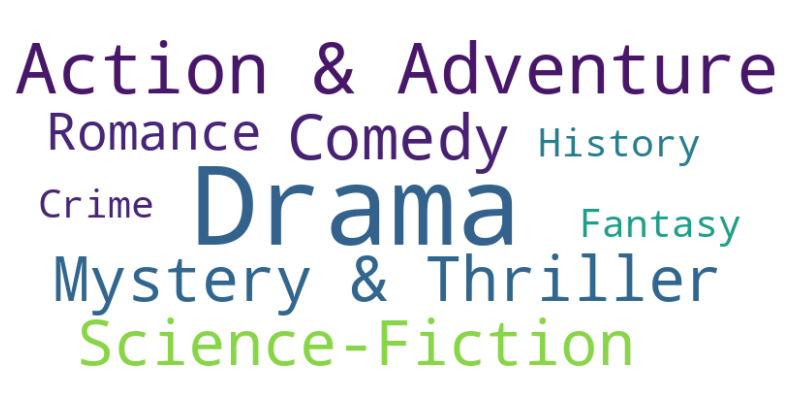

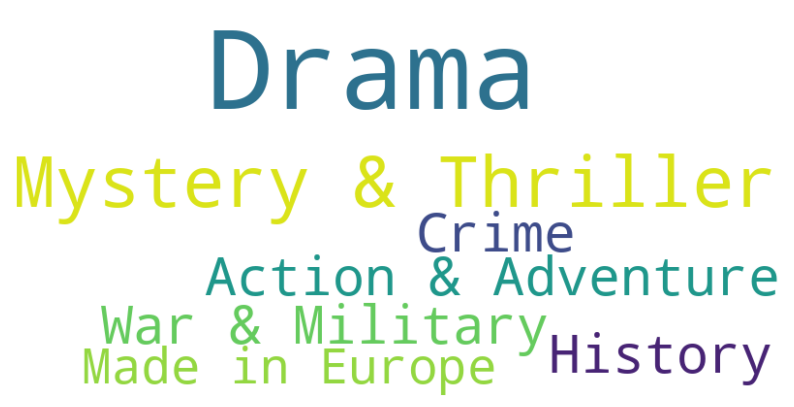

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_genres_movies))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_genres_tv_shows))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
streaming_services_count = {}

for services in movies_filtered['streaming_services']:
    # Check if services is not 'NA'
    if services != 'NA':
        for service in services.split(','):
            service = service.strip()
            streaming_services_count[service] = streaming_services_count.get(service, 0) + 1
streaming_services_counts_sorted = pd.Series(streaming_services_count).sort_values(ascending=False)


streaming_services_count = {}

for services in tv_shows_filtered['streaming_services']:
    # Check if services is not 'NA'
    if services != 'NA':
        for service in services.split(','):
            service = service.strip()
            streaming_services_count[service] = streaming_services_count.get(service, 0) + 1
streaming_services_counts_sorted_tv = pd.Series(streaming_services_count).sort_values(ascending=False)


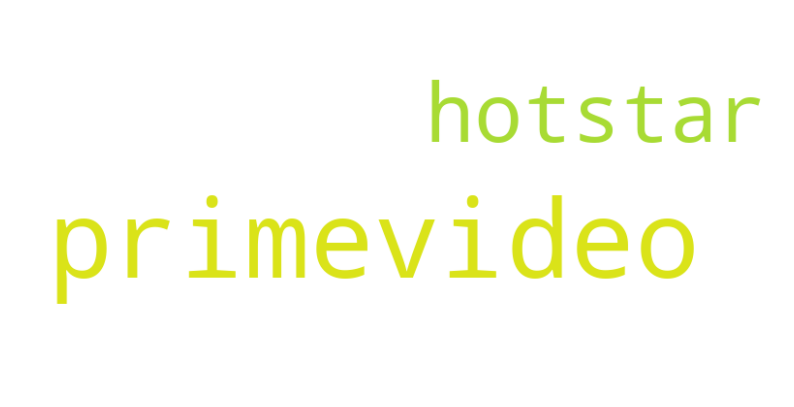

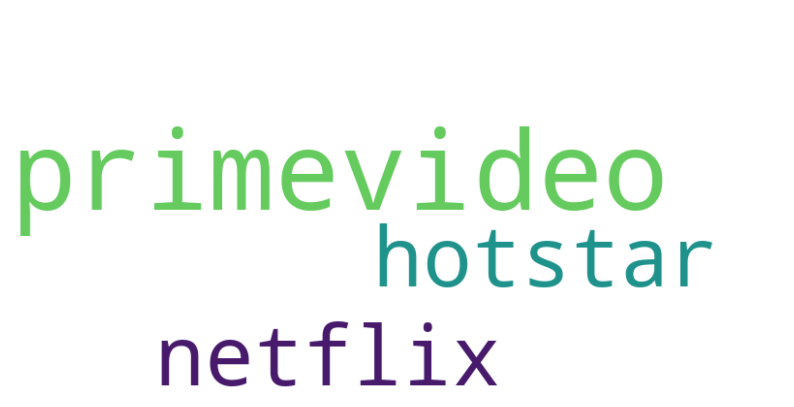

In [ ]:
#Let's Visvalize it using word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(streaming_services_counts_sorted))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(streaming_services_counts_sorted_tv))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movies.to_csv("movies.csv")
tv_shows.to_csv("tv_shows.csv")

In [ ]:
#saving filter data as Filter Data in csv format
tv_shows_filtered.to_csv("tv_shows_filtered.csv")
movies_filtered.to_csv("movies_filtered.csv")